# Example NB

In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet

from prophet.plot import add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


## Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
display(df)

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


## Model

### Basic Stuff

In [3]:
m = Prophet()
m.fit(df)


future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
# forecast cas same dates as future
display(forecast)

13:03:02 - cmdstanpy - INFO - Chain [1] start processing
13:03:02 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041704,8.205584,9.512920,8.041704,8.041704,0.802946,0.802946,0.802946,0.352288,0.352288,0.352288,0.450658,0.450658,0.450658,0.0,0.0,0.0,8.844650
1,2007-12-11,8.040157,7.978722,9.203006,8.040157,8.040157,0.553024,0.553024,0.553024,0.119636,0.119636,0.119636,0.433389,0.433389,0.433389,0.0,0.0,0.0,8.593182
2,2007-12-12,8.038611,7.752281,8.987310,8.038611,8.038611,0.350386,0.350386,0.350386,-0.066669,-0.066669,-0.066669,0.417055,0.417055,0.417055,0.0,0.0,0.0,8.388997
3,2007-12-13,8.037064,7.774695,9.020373,8.037064,8.037064,0.329846,0.329846,0.329846,-0.072254,-0.072254,-0.072254,0.402100,0.402100,0.402100,0.0,0.0,0.0,8.366910
4,2007-12-14,8.035517,7.724844,8.959014,8.035517,8.035517,0.319356,0.319356,0.319356,-0.069575,-0.069575,-0.069575,0.388931,0.388931,0.388931,0.0,0.0,0.0,8.354874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.192173,7.501166,8.919559,6.883110,7.520144,1.017923,1.017923,1.017923,0.048287,0.048287,0.048287,0.969637,0.969637,0.969637,0.0,0.0,0.0,8.210097
3266,2017-01-16,7.191152,7.856491,9.224751,6.880518,7.520820,1.343970,1.343970,1.343970,0.352288,0.352288,0.352288,0.991681,0.991681,0.991681,0.0,0.0,0.0,8.535122
3267,2017-01-17,7.190131,7.553264,9.068724,6.877964,7.521707,1.132419,1.132419,1.132419,0.119636,0.119636,0.119636,1.012783,1.012783,1.012783,0.0,0.0,0.0,8.322549
3268,2017-01-18,7.189109,7.474918,8.891704,6.875410,7.522807,0.966069,0.966069,0.966069,-0.066669,-0.066669,-0.066669,1.032738,1.032738,1.032738,0.0,0.0,0.0,8.155179


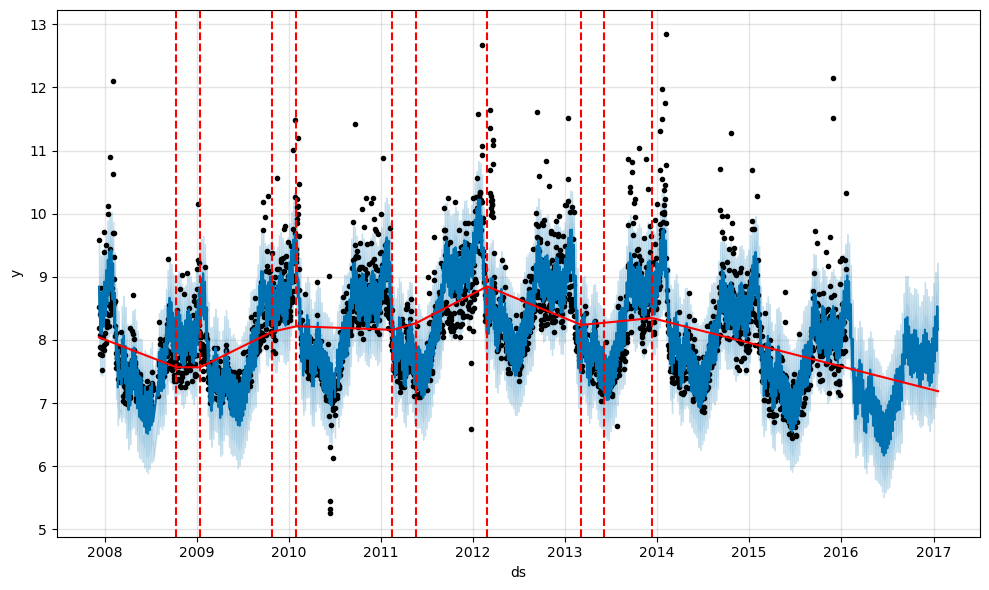

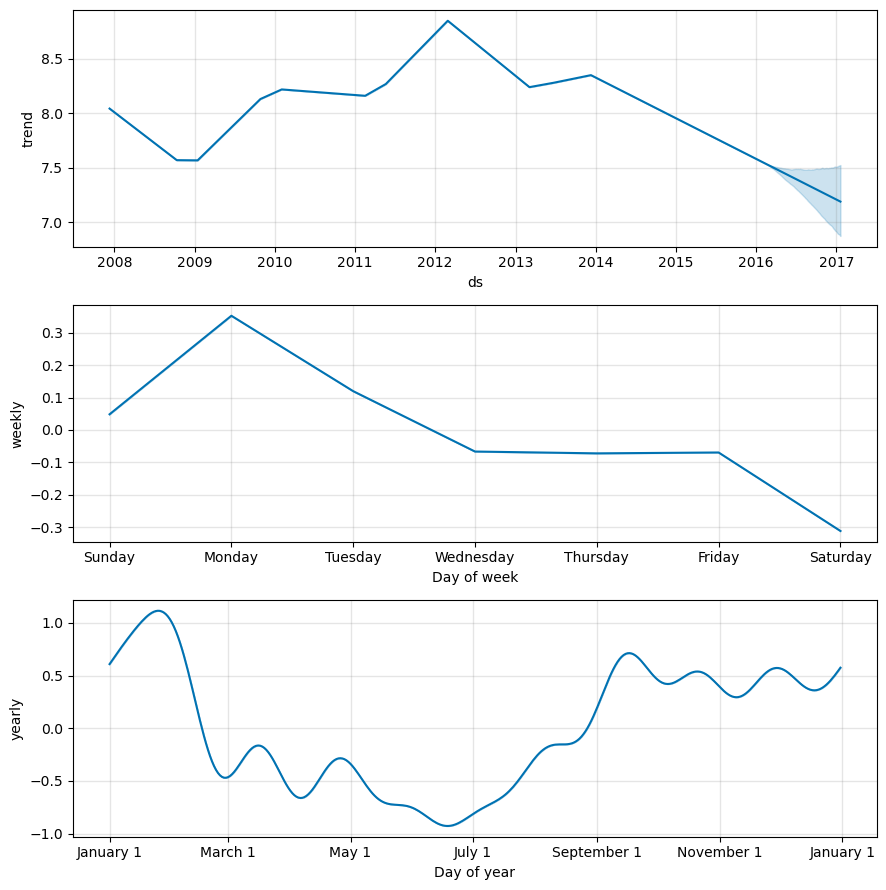

In [4]:
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

### Diagnostics

In [5]:
transformed = m.preprocess(df)
transformed.X

,yearly_delim_1,yearly_delim_2,yearly_delim_3,yearly_delim_4,yearly_delim_5,yearly_delim_6,yearly_delim_7,yearly_delim_8,yearly_delim_9,yearly_delim_10,...,yearly_delim_17,yearly_delim_18,yearly_delim_19,yearly_delim_20,weekly_delim_1,weekly_delim_2,weekly_delim_3,weekly_delim_4,weekly_delim_5,weekly_delim_6
0,-0.377462,0.926025,-0.699079,0.715044,-0.917267,0.398272,-0.999745,0.022576,-0.934311,-0.356460,...,0.335276,-0.942120,0.666089,-0.745872,-4.338837e-01,-0.900969,7.818315e-01,0.623490,-9.749279e-01,-0.222521
1,-0.361478,0.932381,-0.674069,0.738668,-0.895501,0.445059,-0.995827,0.091261,-0.961479,-0.274879,...,0.185987,-0.982552,0.528581,-0.848883,-9.749279e-01,-0.222521,4.338837e-01,-0.900969,7.818315e-01,0.623490
2,-0.345386,0.938461,-0.648262,0.761418,-0.871351,0.490660,-0.987196,0.159513,-0.981538,-0.191266,...,0.032249,-0.999480,0.375470,-0.926834,-7.818315e-01,0.623490,-9.749279e-01,-0.222521,-4.338837e-01,-0.900969
3,-0.329192,0.944263,-0.621687,0.783266,-0.844881,0.534955,-0.973892,0.227011,-0.994341,-0.106239,...,-0.122261,-0.992498,0.211276,-0.977426,5.505235e-14,1.000000,1.101047e-13,1.000000,1.984146e-12,1.000000
4,-0.312900,0.949786,-0.594376,0.804187,-0.816160,0.577825,-0.955979,0.293434,-0.999791,-0.020426,...,-0.273845,-0.961774,0.040844,-0.999166,7.818315e-01,0.623490,9.749279e-01,-0.222521,4.338837e-01,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,0.246857,0.969052,0.478434,0.878124,0.680398,0.732843,0.840248,0.542202,0.948090,0.318001,...,0.781257,-0.624210,0.602988,-0.797750,9.749279e-01,-0.222521,-4.338837e-01,-0.900969,-7.818315e-01,0.623490
2901,0.263489,0.964662,0.508356,0.861147,0.717295,0.696769,0.875539,0.483147,0.971904,0.235379,...,0.675656,-0.737217,0.457531,-0.889193,4.338837e-01,-0.900969,-7.818315e-01,0.623490,9.749279e-01,-0.222521
2902,0.280044,0.959987,0.537677,0.843151,0.752283,0.658840,0.906686,0.421806,0.988531,0.151016,...,0.553893,-0.832588,0.298569,-0.954388,-4.338837e-01,-0.900969,7.818315e-01,0.623490,-9.749279e-01,-0.222521
2903,0.296516,0.955028,0.566362,0.824157,0.785267,0.619157,0.933542,0.358468,0.997850,0.065537,...,0.418879,-0.908042,0.130793,-0.991410,-9.749279e-01,-0.222521,4.338837e-01,-0.900969,7.818315e-01,0.623490


In [6]:
dates = pd.to_datetime(df['ds'])
NANOSECONDS_TO_SECONDS = int(1e9)


In [7]:
dates.to_numpy(dtype=np.int64) / (3600 * 24 * int(1e9))

array([13857., 13858., 13859., ..., 16818., 16819., 16820.])

In [8]:
np.sin(13857 * 2 * np.pi / 365.25)

-0.37746248386179426

In [9]:
m.history

,ds,y,floor,t,y_scaled
0,2007-12-10,9.590761,0.0,0.000000,0.746552
1,2007-12-11,8.519590,0.0,0.000337,0.663171
2,2007-12-12,8.183677,0.0,0.000675,0.637023
3,2007-12-13,8.072467,0.0,0.001012,0.628367
4,2007-12-14,7.893572,0.0,0.001350,0.614441
...,...,...,...,...,...
2900,2016-01-16,7.817223,0.0,0.998650,0.608498
2901,2016-01-17,9.273878,0.0,0.998988,0.721885
2902,2016-01-18,10.333775,0.0,0.999325,0.804388
2903,2016-01-19,9.125871,0.0,0.999663,0.710364


<Axes: >

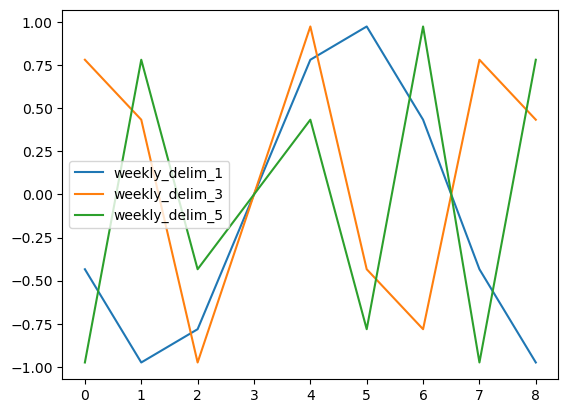

In [10]:
transformed.X[['weekly_delim_1', "weekly_delim_3", "weekly_delim_5"]].iloc[:9].plot()

In [11]:
m.calculate_initial_params(num_total_regressors=transformed.K)

ModelParams(k=-0.05444079622224118, m=0.7465517318876905, delta=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.]), beta=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), sigma_obs=1.0)

## Logisitic

In [12]:
df_logitic = df.copy()
# capacity has to be supplied in the input df
df_logitic['cap'] = 0.8
m_logisitc = Prophet(growth='logistic')
m_logisitc.fit(df_logitic)


13:03:03 - cmdstanpy - INFO - Chain [1] start processing
13:03:03 - cmdstanpy - INFO - Chain [1] done processing


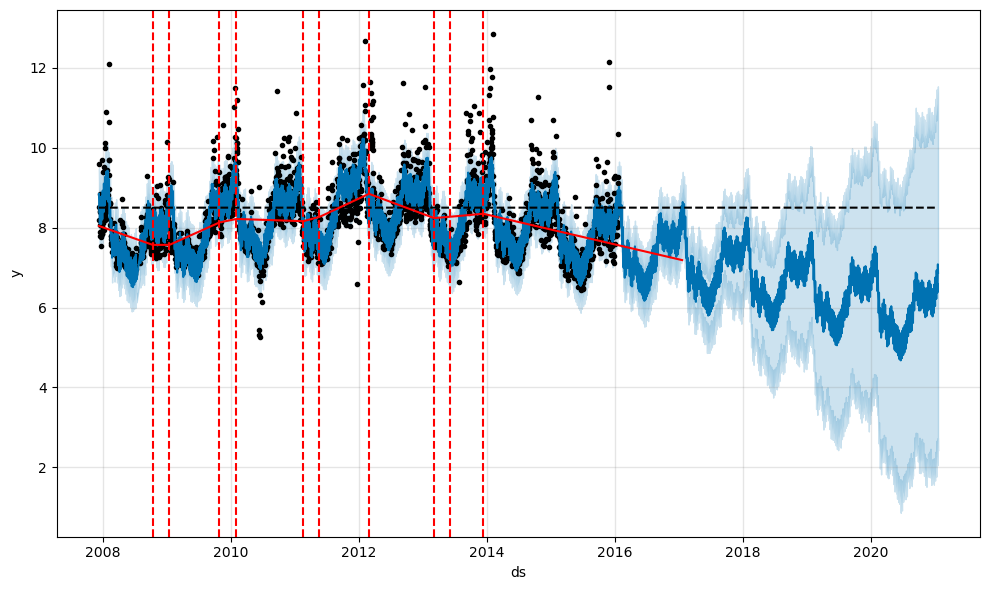

In [13]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)
logistic_a = add_changepoints_to_plot(fig.gca(), m, forecast)
